<a href="https://colab.research.google.com/github/Ahmad-Yas/AI4CCEE_Fall_2024/blob/main/in_class_activity/lecture6/submissions/Lecture_6_Ahmad_yaseen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Activity#1

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=67605159a004533a8e0ec2fe0b3853428a7b4f1d353e44e5bfb5b1aefcbdf69c
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("StockAnalysis").getOrCreate()

In [ ]:
df = spark.read.json("wejo.json")

In [ ]:
df.show(5)

+--------------------+--------------------+--------------------+--------------------+--------------+--------------------+
|   capturedTimestamp|         dataPointId|           journeyId|            location|       metrics|             vehicle|
+--------------------+--------------------+--------------------+--------------------+--------------+--------------------+
|2023-04-12T19:00:...|02d77c7e-1ac8-45b...|2fe4fae05dd1198d1...|{US, 9zx3z0, 42.4...|{359.0, 38.01}|{{MID_JOURNEY}, 8...|
|2023-04-12T19:00:...|03fde858-5922-446...|1183a6bfb3178ba00...|{US, 9zmsbr, 41.6...| {90.0, 41.47}|{{MID_JOURNEY}, -...|
|2023-04-12T19:00:...|04ce2a2c-d0fd-419...|1c96529d9ccf86042...|{US, 9zkupt, 41.5...|  {0.0, 36.86}|{{MID_JOURNEY}, 8...|
|2023-04-12T19:00:...|0cb3960d-741f-4e4...|78a91884d85030415...|{US, 9ze3y1, 42.5...|{320.0, 14.97}|{{MID_JOURNEY}, 2...|
|2023-04-12T18:59:...|0cb7b764-c733-43a...|594fc4306bf489d22...|{US, 9zmkdu, 41.5...| {181.28, 0.0}|{{MID_JOURNEY}, 2...|
+--------------------+--

In [ ]:
df.select("location.latitude", "location.longitude", "metrics.speed").show(5)


+----------+------------------+-----+
|  latitude|         longitude|speed|
+----------+------------------+-----+
| 42.497317|        -90.740595|38.01|
| 41.658504|        -93.500216|41.47|
| 41.515211|        -94.232996|36.86|
| 42.502249|        -96.410195|14.97|
|41.5958361|-93.73612159999999|  0.0|
+----------+------------------+-----+
only showing top 5 rows



In [ ]:
filtered_df = df.filter(df["metrics.speed"] > 30)
filtered_df.show()

+--------------------+--------------------+--------------------+--------------------+---------------+--------------------+
|   capturedTimestamp|         dataPointId|           journeyId|            location|        metrics|             vehicle|
+--------------------+--------------------+--------------------+--------------------+---------------+--------------------+
|2023-04-12T19:00:...|02d77c7e-1ac8-45b...|2fe4fae05dd1198d1...|{US, 9zx3z0, 42.4...| {359.0, 38.01}|{{MID_JOURNEY}, 8...|
|2023-04-12T19:00:...|03fde858-5922-446...|1183a6bfb3178ba00...|{US, 9zmsbr, 41.6...|  {90.0, 41.47}|{{MID_JOURNEY}, -...|
|2023-04-12T19:00:...|04ce2a2c-d0fd-419...|1c96529d9ccf86042...|{US, 9zkupt, 41.5...|   {0.0, 36.86}|{{MID_JOURNEY}, 8...|
|2023-04-12T18:59:...|10bdafbc-0c68-473...|58ce2205d57767dc5...|{US, 9zmrj3, 42.0...|  {34.0, 64.51}|{{MID_JOURNEY}, 4...|
|2023-04-12T18:59:...|13b8bae1-dc35-425...|c22f59f9c35cbcfd7...|{US, 9zmkmk, 41.5...|  {89.0, 55.29}|{{MID_JOURNEY}, -...|
|2023-04-12T19:0

In [ ]:
count = filtered_df.count()
print(f"Number of data points with speed > 30 mph: {count}")

Number of data points with speed > 30 mph: 2395


In [ ]:
filtered_data = filtered_df.collect()
for row in filtered_data:
    print(row)

Row(capturedTimestamp='2023-04-12T19:00:04.000-0500', dataPointId='02d77c7e-1ac8-45bc-978f-7c3855f5ff9b', journeyId='2fe4fae05dd1198d1995d8f9e34d69a5ca1cc8bc', location=Row(countryCode='US', geohash='9zx3z0', latitude=42.497317, longitude=-90.740595, postalCode='52002', regionCode='IA'), metrics=Row(heading=359.0, speed=38.01), vehicle=Row(status=Row(ignitionStatus='MID_JOURNEY'), wejoVehicleTypeId=8905611058720503136))
Row(capturedTimestamp='2023-04-12T19:00:21.000-0500', dataPointId='03fde858-5922-446a-b68a-00167b866c6e', journeyId='1183a6bfb3178ba00a4a8585aca72db2d4e689ad', location=Row(countryCode='US', geohash='9zmsbr', latitude=41.658504, longitude=-93.500216, postalCode='50009', regionCode='IA'), metrics=Row(heading=90.0, speed=41.47), vehicle=Row(status=Row(ignitionStatus='MID_JOURNEY'), wejoVehicleTypeId=-5486746399762838414))
Row(capturedTimestamp='2023-04-12T19:00:10.000-0500', dataPointId='04ce2a2c-d0fd-4197-9416-9324c9a5106c', journeyId='1c96529d9ccf86042ca98744b3f3b710c24

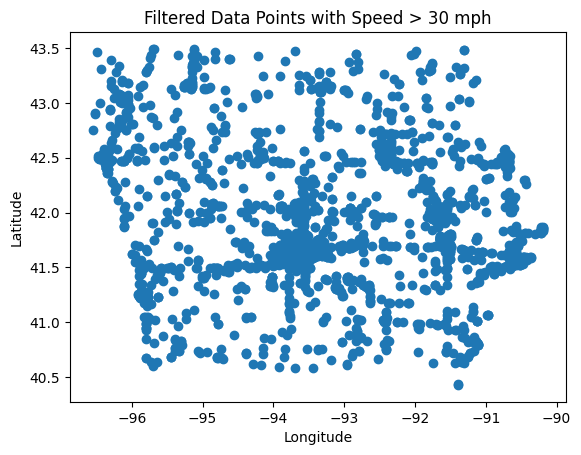

In [ ]:
import matplotlib.pyplot as plt
latitudes = [row['location']['latitude'] for row in filtered_data]
longitudes = [row['location']['longitude'] for row in filtered_data]
plt.scatter(longitudes, latitudes)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Filtered Data Points with Speed > 30 mph')
plt.show()

In [ ]:
#Activity#2

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("StockPriceAnalysis").getOrCreate()

In [ ]:
df = spark.read.csv("/content/apple_stock.csv", header=True, inferSchema=True)
df.show(20)


+----------+------------------+------------------+------------------+------------------+---------+------------------+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+----------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|
|2010-01-11|212.79999700000002|        213.000002|      

In [ ]:
df.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Adj Close: double (nullable = true)



In [ ]:
num_rows = df.count()
print(f"Number of rows in the DataFrame: {num_rows}")

Number of rows in the DataFrame: 1762


In [ ]:
df.describe().show()

+-------+------------------+------------------+------------------+-----------------+-------------------+------------------+
|summary|              Open|              High|               Low|            Close|             Volume|         Adj Close|
+-------+------------------+------------------+------------------+-----------------+-------------------+------------------+
|  count|              1762|              1762|              1762|             1762|               1762|              1762|
|   mean| 313.0763111589103| 315.9112880164581| 309.8282405079457|312.9270656379113|9.422577587968218E7| 75.00174115607275|
| stddev|185.29946803981522|186.89817686485767|183.38391664371008|185.1471036170943|6.020518776592709E7| 28.57492972179906|
|    min|              90.0|         90.699997|         89.470001|        90.279999|           11475900|         24.881912|
|    max|        702.409988|        705.070023|        699.569977|       702.100021|          470249500|127.96609099999999|
+-------

In [ ]:
df = df.withColumn("Price_Change", df["Close"] - df["Open"])
df.select("Date", "Open", "Close", "Price_Change").show()

+----------+------------------+------------------+--------------------+
|      Date|              Open|             Close|        Price_Change|
+----------+------------------+------------------+--------------------+
|2010-01-04|        213.429998|        214.009998|  0.5799999999999841|
|2010-01-05|        214.599998|        214.379993|-0.22000499999998624|
|2010-01-06|        214.379993|        210.969995| -3.4099980000000016|
|2010-01-07|            211.75|            210.58| -1.1699999999999875|
|2010-01-08|        210.299994|211.98000499999998|   1.680010999999979|
|2010-01-11|212.79999700000002|210.11000299999998| -2.6899940000000413|
|2010-01-12|209.18999499999998|        207.720001| -1.4699939999999856|
|2010-01-13|        207.870005|        210.650002|  2.7799970000000087|
|2010-01-14|210.11000299999998|            209.43| -0.6800029999999708|
|2010-01-15|210.92999500000002|            205.93|  -4.999995000000013|
|2010-01-19|        208.330002|        215.039995|   6.709992999

In [ ]:
average_volume = df.agg({"Volume": "avg"}).collect()[0][0]
print(f"Average Daily Volume: {average_volume}")

Average Daily Volume: 94225775.87968218


In [ ]:
max_close = df.agg({"Close": "max"}).collect()[0][0]
print(f"Maximum Closing Price: {max_close}")
min_close = df.agg({"Close": "min"}).collect()[0][0]
print(f"Minimum Closing Price: {min_close}")


Maximum Closing Price: 702.100021
Minimum Closing Price: 90.279999


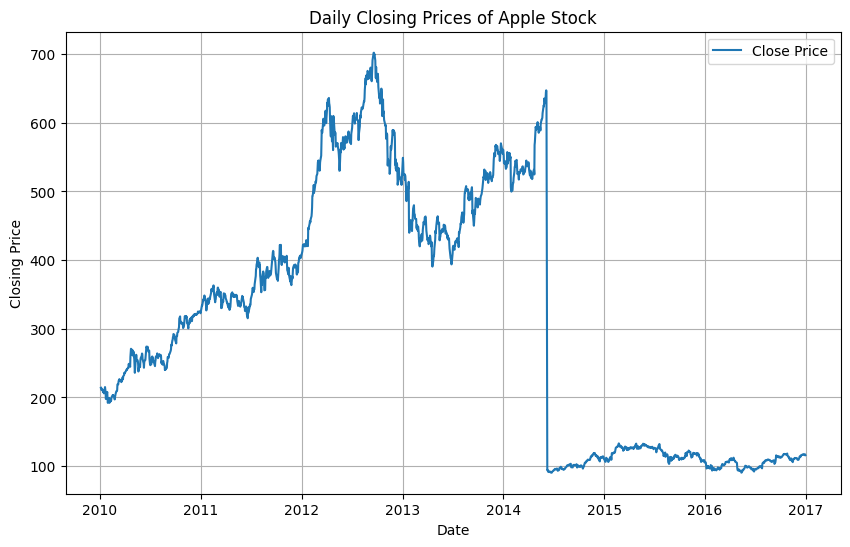

In [ ]:
import matplotlib.pyplot as plt
pandas_df = df.select("Date", "Close").toPandas()
pandas_df['Date'] = pandas_df['Date'].astype('datetime64[ns]')
plt.figure(figsize=(10,6))
plt.plot(pandas_df['Date'], pandas_df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Daily Closing Prices of Apple Stock')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#activity3

In [ ]:
!pip install pyspark seaborn matplotlib

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import IntegerType, DoubleType
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import pandas as pd

In [ ]:
spark = SparkSession.builder.appName("SpeedAnalysis").getOrCreate()

In [ ]:
from google.colab import files
df = spark.read.csv("/content/ID_31_data.csv", header=True, inferSchema=True)
df.show(5)

+-------------------+---------+----------+-----------+-------+--------+---+----+--------+--------------+-----------+---------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+-----------+----------+----+----------+-------------------+-------------------+-------------------+-------+-------+-------+-----------+----------+---------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+---------------+-----------+----------+---------+--------------------+--------+-----------------+
|  capturedtimestamp| latitude| longitude|      speed|geohash|   month|day|hour|      ID|Custom_ID_left|index_right|Custom_ID_right|FIRST_ROUT_1|FIRST_ROAD_1|FIRST_MEDI_1|FIRST_AADT_1|FIRST_NUMB_1| MEAN_AADT_1|MEAN_EXPAN_1|MEAN_PERCE_1|MEAN_MEDIA_1| MEAN_SURFA_1|BUFF_DIST_1|ORIG_FID_1|freq|      date|             Time26|         date_time1|          

In [ ]:
df = df.withColumn("speed", df["speed"].cast(DoubleType()))
df = df.withColumn("ID", df["ID"].cast(IntegerType()))

In [ ]:
speed_limit = 60
df = df.withColumn("fraction_5_over_limit", F.when(df["speed"] > speed_limit + 5, 1).otherwise(0))
df = df.withColumn("fraction_10_over_limit", F.when(df["speed"] > speed_limit + 10, 1).otherwise(0))
df = df.withColumn("fraction_20_over_limit", F.when(df["speed"] > speed_limit + 20, 1).otherwise(0))
statistics = df.agg(
    F.mean("fraction_5_over_limit").alias("fraction_5_over_limit"),
    F.mean("fraction_10_over_limit").alias("fraction_10_over_limit"),
    F.mean("fraction_20_over_limit").alias("fraction_20_over_limit")
)
statistics.show()


+---------------------+----------------------+----------------------+
|fraction_5_over_limit|fraction_10_over_limit|fraction_20_over_limit|
+---------------------+----------------------+----------------------+
| 0.019125843355822823|                   0.0|                   0.0|
+---------------------+----------------------+----------------------+



In [ ]:
median_speed = df.groupBy("ID").agg(F.expr('percentile_approx(speed, 0.5)').alias("median_speed"))
median_speed.show()

+----+------------+
|  ID|median_speed|
+----+------------+
|NULL|   56.544761|
+----+------------+



In [ ]:
pandas_df = df.toPandas()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


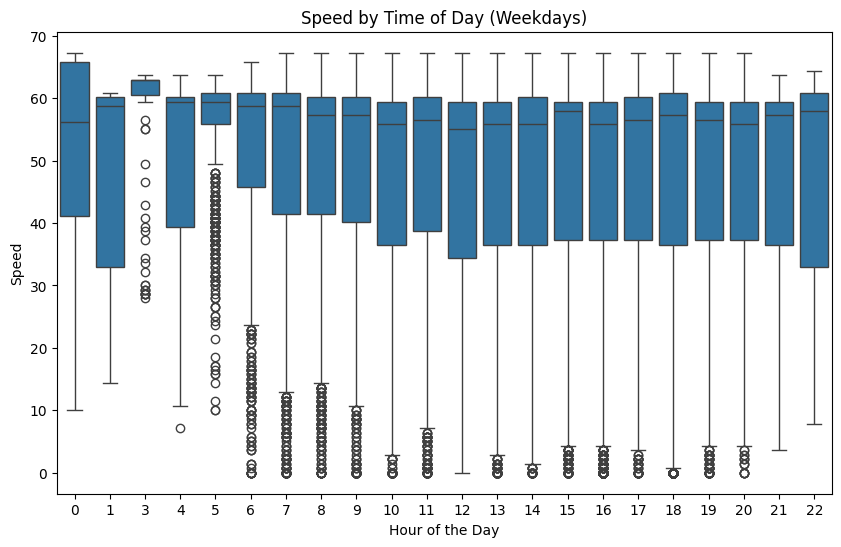

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


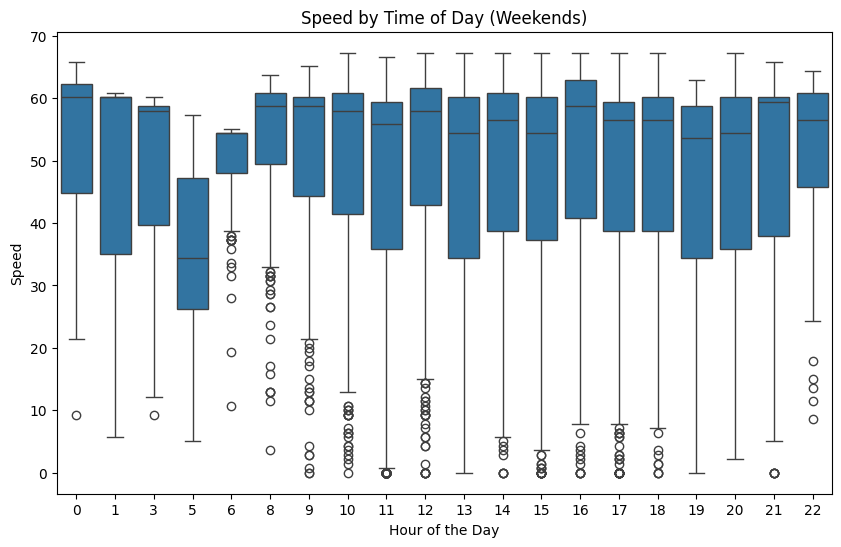

In [ ]:
day_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}
pandas_df["day_of_week"] = pandas_df["day_of_week"].map(day_mapping)
weekdays = pandas_df[pandas_df["day_of_week"] < 6]
weekends = pandas_df[pandas_df["day_of_week"] >= 6]
plt.figure(figsize=(10,6))
sns.boxplot(x="hour", y="speed", data=weekdays)
plt.title("Speed by Time of Day (Weekdays)")
plt.xlabel("Hour of the Day")
plt.ylabel("Speed")
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(x="hour", y="speed", data=weekends)
plt.title("Speed by Time of Day (Weekends)")
plt.xlabel("Hour of the Day")
plt.ylabel("Speed")
plt.show()


In [ ]:
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
logger.info("Statistics:")
logger.info(f"Fraction 5 over limit: {statistics.collect()[0]['fraction_5_over_limit']}")
logger.info(f"Fraction 10 over limit: {statistics.collect()[0]['fraction_10_over_limit']}")
logger.info(f"Fraction 20 over limit: {statistics.collect()[0]['fraction_20_over_limit']}")
statistics.show()


+---------------------+----------------------+----------------------+
|fraction_5_over_limit|fraction_10_over_limit|fraction_20_over_limit|
+---------------------+----------------------+----------------------+
| 0.019125843355822823|                   0.0|                   0.0|
+---------------------+----------------------+----------------------+

